In [1]:
import pandas as pd
import numpy as np
import time
import psutil
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "tour.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

In [2]:
# Drop unnecessary columns
df_cleaned = df.drop(columns=["Unnamed: 6"], errors='ignore')


In [3]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ["Location", "Country", "Category"]

for col in categorical_columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le


In [4]:
# Reduce dataset size to avoid memory issues
sample_size = 1000  # Limit to 1000 rows
df_sampled = df_cleaned.sample(n=sample_size, random_state=42)


In [5]:
# Select features for clustering
X_sampled = df_sampled.values


In [6]:
# Measure execution time
start_time = time.time()

In [7]:
# Measure memory usage before clustering
process = psutil.Process()
mem_before = process.memory_info().rss / 1024 ** 2  # Convert to MB

In [8]:
# Apply Affinity Propagation on the sampled data
ap = AffinityPropagation(random_state=42)
clusters_sampled = ap.fit_predict(X_sampled)


In [9]:
# Measure memory usage after clustering
mem_after = process.memory_info().rss / 1024 ** 2  # Convert to MB

In [10]:
# Execution time
execution_time_sampled = time.time() - start_time

In [11]:
# Compute silhouette score for clustering accuracy
silhouette_avg_sampled = silhouette_score(X_sampled, clusters_sampled)

In [40]:
# Memory usage difference
memory_usage_sampled = mem_after - mem_before
num_clusters = len(np.unique(clusters_sampled))

In [41]:
# Store results
clustering_results_sampled = {
    "Execution Time (s)": execution_time_sampled,
    "Silhouette Score (Accuracy)": silhouette_avg_sampled,
    "Memory Usage (MB)": memory_usage_sampled,
    "Number of Clusters": num_clusters,
    
}

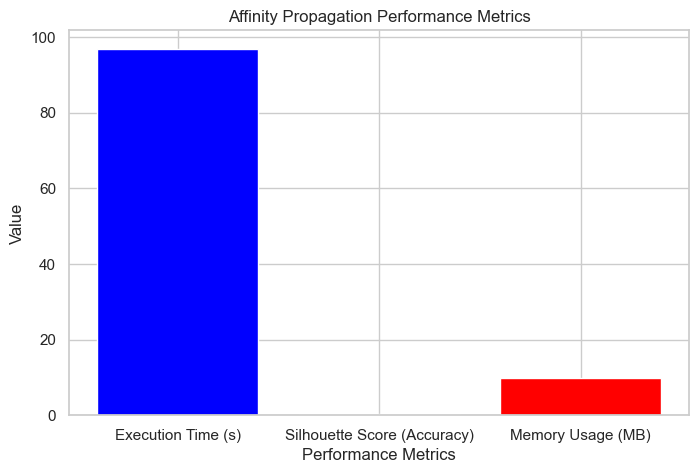

{'Execution Time (s)': 96.98099446296692, 'Silhouette Score (Accuracy)': np.float64(0.34423743618399744), 'Memory Usage (MB)': 9.9609375, 'Number of Clusters': 30}


In [42]:
# Plot performance metrics
metrics = ["Execution Time (s)", "Silhouette Score (Accuracy)", "Memory Usage (MB)"]
values = [execution_time_sampled, silhouette_avg_sampled, memory_usage_sampled]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'green', 'red'])
plt.xlabel("Performance Metrics")
plt.ylabel("Value")
plt.title("Affinity Propagation Performance Metrics")
plt.show()

print(clustering_results_sampled)

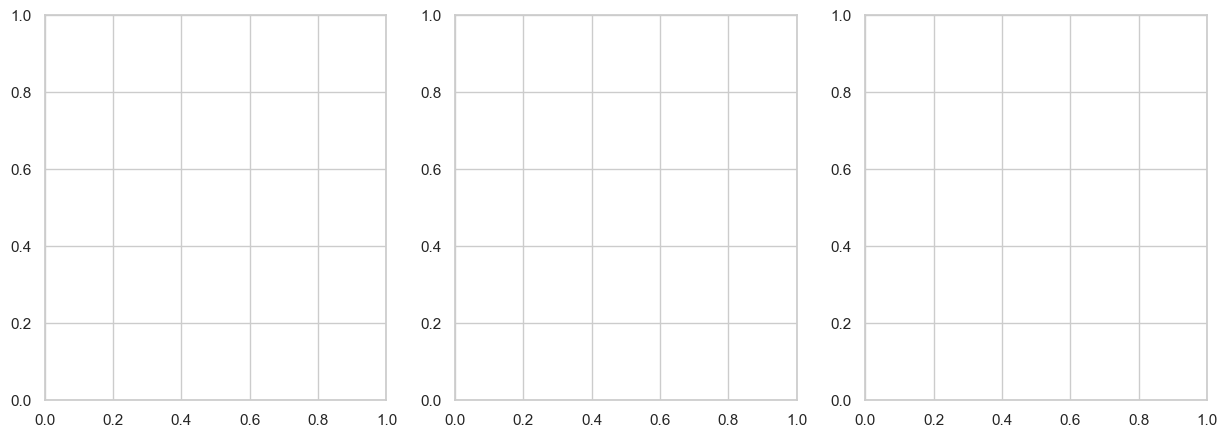

In [43]:
# Plot separate graphs for each metric
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

In [44]:
# Execution Time Graph
axes[0].bar(["Execution Time"], [execution_time_sampled], color='blue')
axes[0].set_title("Execution Time (s)")
axes[0].set_ylabel("Seconds")

Text(4.444444444444459, 0.5, 'Seconds')

In [45]:
# Silhouette Score Graph
axes[1].bar(["Silhouette Score"], [silhouette_avg_sampled], color='green')
axes[1].set_title("Silhouette Score (Accuracy)")
axes[1].set_ylabel("Score")

Text(414.73856209150335, 0.5, 'Score')

In [46]:
# Memory Usage Graph
axes[2].bar(["Memory Usage"], [memory_usage_sampled], color='red')
axes[2].set_title("Memory Usage (MB)")
axes[2].set_ylabel("Megabytes")

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [47]:
print(clustering_results_sampled)

{'Execution Time (s)': 96.98099446296692, 'Silhouette Score (Accuracy)': np.float64(0.34423743618399744), 'Memory Usage (MB)': 9.9609375, 'Number of Clusters': 30}


In [48]:
import seaborn as sns


In [49]:
# Pictorial Graphs
sns.set(style="whitegrid")

C:\Users\Harini\AppData\Local\Temp\ipykernel_12900\1895661952.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Execution Time (s)"], y=[execution_time_sampled], palette="Blues")


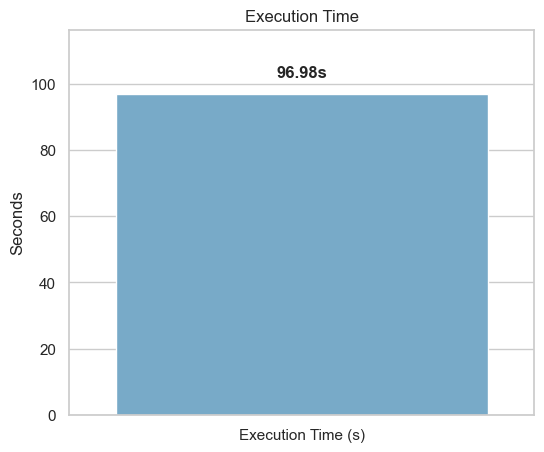

In [50]:
# Execution Time Graph
plt.figure(figsize=(6, 5))
sns.barplot(x=["Execution Time (s)"], y=[execution_time_sampled], palette="Blues")
plt.title("Execution Time")
plt.ylabel("Seconds")
plt.ylim(0, execution_time_sampled * 1.2)  # Adjusting height
for i, v in enumerate([execution_time_sampled]):
    plt.text(i, v + (v * 0.05), f"{v:.2f}s", ha='center', fontsize=12, fontweight='bold')
plt.show()

C:\Users\Harini\AppData\Local\Temp\ipykernel_12900\1747649856.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Silhouette Score"], y=[silhouette_avg_sampled], palette="Greens")


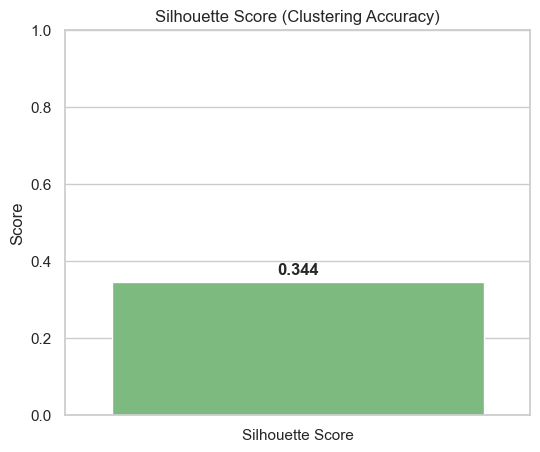

In [51]:
# Silhouette Score Graph
plt.figure(figsize=(6, 5))
sns.barplot(x=["Silhouette Score"], y=[silhouette_avg_sampled], palette="Greens")
plt.title("Silhouette Score (Clustering Accuracy)")
plt.ylabel("Score")
plt.ylim(0, 1)  # Silhouette score is between 0 and 1
for i, v in enumerate([silhouette_avg_sampled]):
    plt.text(i, v + 0.02, f"{v:.3f}", ha='center', fontsize=12, fontweight='bold')
plt.show()

C:\Users\Harini\AppData\Local\Temp\ipykernel_12900\3993967918.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Memory Usage (MB)"], y=[memory_usage_sampled], palette="Reds")


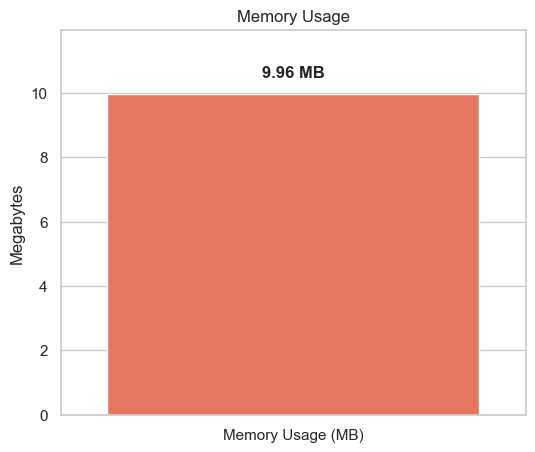

In [52]:
# Memory Usage Graph
plt.figure(figsize=(6, 5))
sns.barplot(x=["Memory Usage (MB)"], y=[memory_usage_sampled], palette="Reds")
plt.title("Memory Usage")
plt.ylabel("Megabytes")
plt.ylim(0, memory_usage_sampled * 1.2)  # Adjusting height
for i, v in enumerate([memory_usage_sampled]):
    plt.text(i, v + (v * 0.05), f"{v:.2f} MB", ha='center', fontsize=12, fontweight='bold')
plt.show()

C:\Users\Harini\AppData\Local\Temp\ipykernel_12900\2904378422.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Number of Clusters"], y=[num_clusters], palette="Purples")


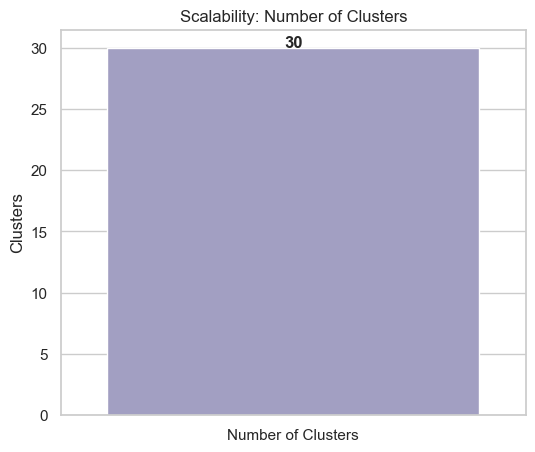

In [53]:
# Scalability Graph (Clusters vs. Execution Time)
plt.figure(figsize=(6, 5))
sns.barplot(x=["Number of Clusters"], y=[num_clusters], palette="Purples")
plt.title("Scalability: Number of Clusters")
plt.ylabel("Clusters")
for i, v in enumerate([num_clusters]):
    plt.text(i, v + 0.05, f"{v}", ha='center', fontsize=12, fontweight='bold')
plt.show()

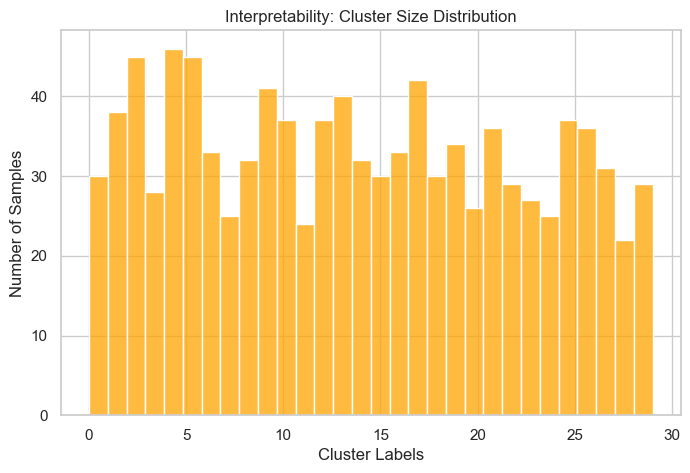

In [54]:
# Interpretability Graph (Cluster Size Distribution)
plt.figure(figsize=(8, 5))
sns.histplot(clusters_sampled, bins=num_clusters, kde=False, color="orange")
plt.title("Interpretability: Cluster Size Distribution")
plt.xlabel("Cluster Labels")
plt.ylabel("Number of Samples")
plt.show()